# 1
Due to large sizes of data sets in practice one need to do dimension reduction thereafter
study the pattern by various clusterings techniques. Dimension reduction means lost
of certain information whence less accuracy of clustering results in general. In this
question, we consider the Iris data set as four dimensional data set with the ground
truce lab el: setosa, versicolor, virginica and use the k-means for clustering.

In [1]:
from sklearn import datasets
import numpy as np

df = datasets.load_iris(as_frame=True)
features = df.data
target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

## a)
First determine three clusters of Iris data set by k-means, and even compute the percentage of correct classied observations.

In [2]:
from sklearn.cluster import KMeans
np.random.seed(1)

kmeans_a = KMeans(n_clusters=3).fit(X=features)
pred_a = kmeans_a.predict(features)

pred_a

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [3]:
# matrix of clusters with target
import pandas as pd
confusion_a = pd.DataFrame({'true': target, 'cluster': pred_a})
confusion_a = confusion_a.value_counts().unstack(fill_value=0)
confusion_a.columns = ['Cluster ' + str(i+1) for i in confusion_a.columns]
confusion_a.loc['Total'] = confusion_a.sum()
confusion_a

,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0,50,0
versicolor,47,0,3
virginica,14,0,36
Total,61,50,39


In [4]:
# percentages
conf_a_perc = confusion_a.copy()
conf_a_perc["Cluster 1"] = np.round(conf_a_perc["Cluster 1"] / conf_a_perc.loc["Total", "Cluster 1"], 2)
conf_a_perc["Cluster 2"] = np.round(conf_a_perc["Cluster 2"] / conf_a_perc.loc["Total", "Cluster 2"], 2)
conf_a_perc["Cluster 3"] = np.round(conf_a_perc["Cluster 3"] / conf_a_perc.loc["Total", "Cluster 3"], 2)
conf_a_perc

,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0.00,1.0,0.00
versicolor,0.77,0.0,0.08
virginica,0.23,0.0,0.92
Total,1.00,1.0,1.00


## b) 
Now apply first the factor analysis metho d to reduce the Iris data set to two
dimensional, then determine three clusters of the reduce data set by k-means.
What is then the p ercentage of correct classified observations ? Even visualize the
reduced data set with original lab el resp ectively by the clustering.

In [5]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2).fit_transform(features)
fa

array([[-1.32761727e+00, -5.61310764e-01],
       [-1.33763854e+00, -2.79764907e-03],
       [-1.40281483e+00,  3.06349492e-01],
       [-1.30104274e+00,  7.18826835e-01],
       [-1.33342439e+00, -3.64588985e-01],
       [-1.14667134e+00, -1.04228193e+00],
       [-1.35307178e+00,  5.74473558e-01],
       [-1.27940722e+00, -2.33129838e-01],
       [-1.36530876e+00,  1.12229944e+00],
       [-1.28651978e+00,  4.72301660e-02],
       [-1.25777170e+00, -1.18508651e+00],
       [-1.23700429e+00,  2.91772867e-01],
       [-1.34543381e+00,  2.06818259e-01],
       [-1.53401771e+00,  1.05544473e+00],
       [-1.39682229e+00, -2.38993243e+00],
       [-1.23819458e+00, -1.98969103e+00],
       [-1.36091949e+00, -1.37946760e+00],
       [-1.32540156e+00, -5.50623528e-01],
       [-1.13192081e+00, -1.69029724e+00],
       [-1.27252223e+00, -5.37071207e-01],
       [-1.14996491e+00, -9.45749580e-01],
       [-1.27007895e+00, -5.02802605e-01],
       [-1.56999078e+00,  1.79437924e-01],
       [-1.

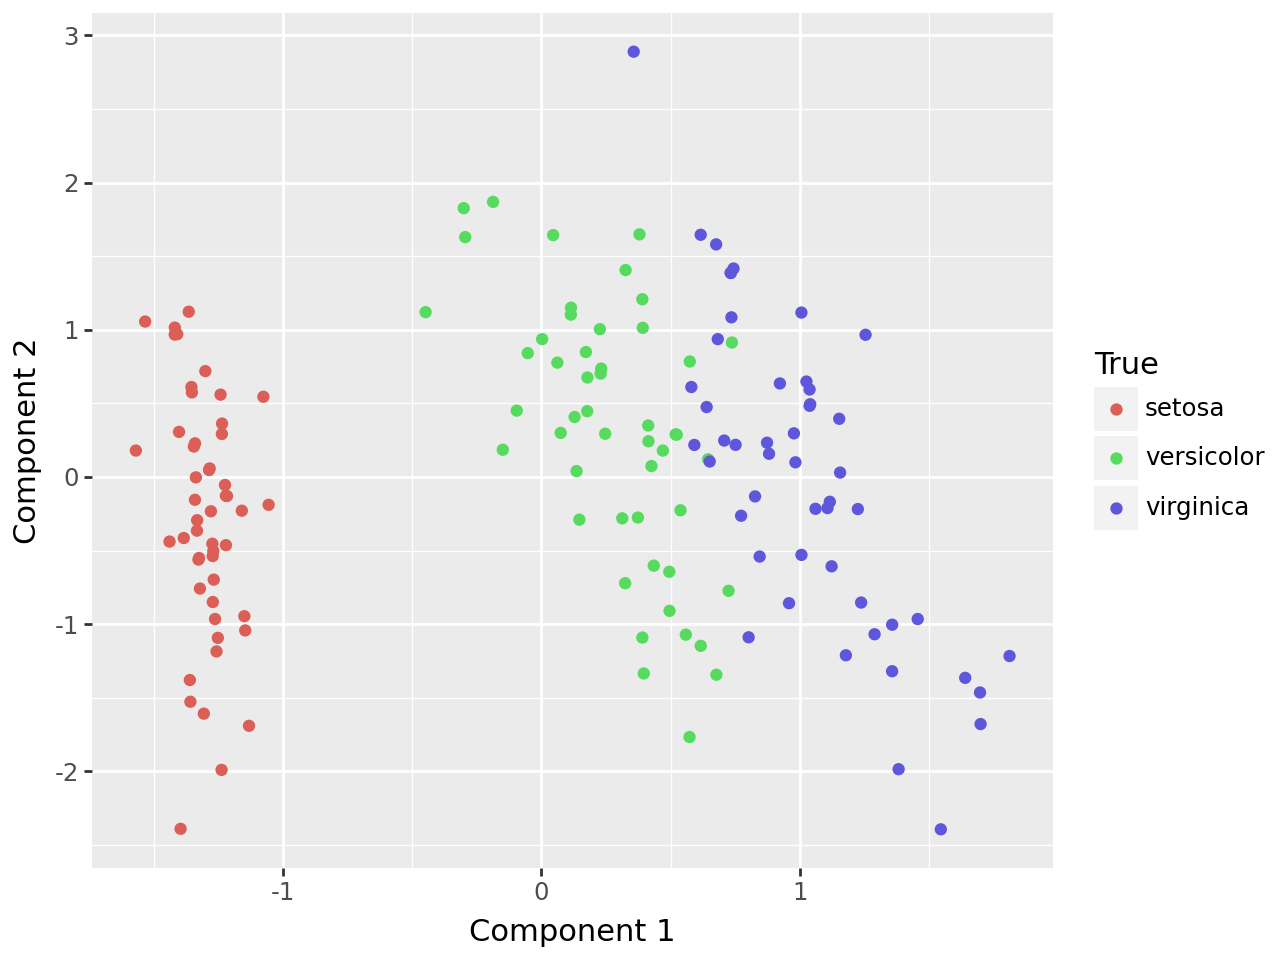

In [6]:
from plotnine import *
fa_df = pd.DataFrame(fa, columns=['Component 1', 'Component 2'])
fa_df["True"] = target

(
  ggplot(aes(x='Component 1', y='Component 2', color='True'), fa_df) +
  geom_point() 
)

In [7]:
np.random.seed(1)
kmeans_b = KMeans(n_clusters=3).fit(X=fa)
pred = kmeans_b.predict(fa)
confusion_b = pd.DataFrame({'true': target, 'cluster': pred})
confusion_b = confusion_b.value_counts().unstack(fill_value=0)
confusion_b.columns = ['Cluster ' + str(i+1) for i in confusion_b.columns]
confusion_b.loc['Total'] = confusion_b.sum()
conf_b_perc = confusion_b.copy()
conf_b_perc["Cluster 1"] = np.round(conf_b_perc["Cluster 1"] / conf_b_perc.loc["Total", "Cluster 1"], 2)
conf_b_perc["Cluster 2"] = np.round(conf_b_perc["Cluster 2"] / conf_b_perc.loc["Total", "Cluster 2"], 2)
conf_b_perc["Cluster 3"] = np.round(conf_b_perc["Cluster 3"] / conf_b_perc.loc["Total", "Cluster 3"], 2)
# join the two confusion matrices, build the string as total (perc)
confusion_b_merged = confusion_b.merge(conf_b_perc, on="true", suffixes=('_total', '_perc'))
confusion_b_merged["Cluster 1"] = confusion_b_merged["Cluster 1_total"].astype(str) + " (" + confusion_b_merged["Cluster 1_perc"].astype(str) + ")"
confusion_b_merged["Cluster 2"] = confusion_b_merged["Cluster 2_total"].astype(str) + " (" + confusion_b_merged["Cluster 2_perc"].astype(str) + ")"
confusion_b_merged["Cluster 3"] = confusion_b_merged["Cluster 3_total"].astype(str) + " (" + confusion_b_merged["Cluster 3_perc"].astype(str) + ")"
confusion_b_merged = confusion_b_merged[["Cluster 1", "Cluster 2", "Cluster 3"]]
confusion_b_merged

c:\Users\ap9169\eda-exam\.pixi\envs\default\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


,Cluster 1,Cluster 2,Cluster 3
true,,,
setosa,0 (0.0),50 (1.0),0 (0.0)
versicolor,15 (0.38),0 (0.0),35 (0.57)
virginica,24 (0.62),0 (0.0),26 (0.43)
Total,39 (1.0),50 (1.0),61 (1.0)


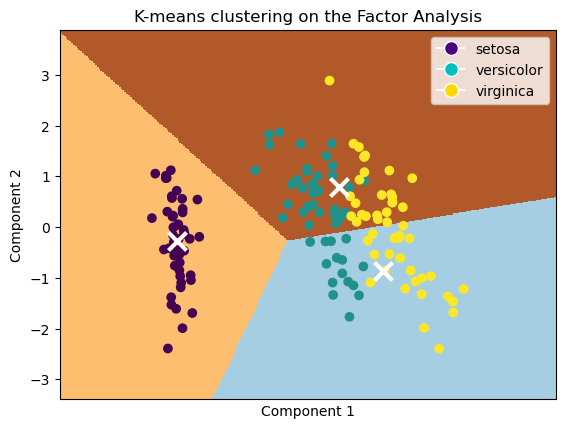

In [8]:
import matplotlib.pyplot as plt

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = fa[:, 0].min() - 1, fa[:, 0].max() + 1
y_min, y_max = fa[:, 1].min() - 1, fa[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_b.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

# Plot the centroids as a white X
centroids = kmeans_b.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# add color to each point as the true
plt.scatter(fa[:, 0], fa[:, 1], c=target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2}))
# add legend to this last scatter
# https://i.pinimg.com/originals/84/7f/51/847f5100d01c7d1896d287377fea7308.png
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='setosa', markerfacecolor='indigo', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='versicolor', markerfacecolor='c', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='virginica', markerfacecolor='gold', markersize=10)])

plt.title("K-means clustering on the Factor Analysis")
plt.xticks(())
plt.show()

# 2
Consider the minimum spanning trees method (MST) and lung cancer data set LungA

In [9]:
from pyprojroot import here
import scipy.io
import networkx as nx
mat = scipy.io.loadmat(here("data/lungA.mat"))
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat Sep 20 10:56:35 2003',
 '__version__': '1.0',
 '__globals__': [],
 'labA': array([[array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         array(['AD'], dtype='<U2'), array(['AD'], dtype='<U2'),
         a

In [10]:
labA = pd.DataFrame(np.transpose(mat["labA"]))
labA.columns = ["label"]
labA["label"] = labA["label"].astype(str)
labA["label"] = labA["label"].str.extract(r"'(.*?)'")
labA.value_counts()

label
AD       139
SQ        21
COID      20
NL        17
SMCL       6
Name: count, dtype: int64

In [11]:
lungA = pd.DataFrame(mat["lungA"])
lungA

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,200,201,202
0,-7.27,13.37,5.975,21.135,-4.01,13.85,-8.950,-14.50,-3.115,10.63,...,79.90,30.11,32.56,48.24,36.54,80.85,37.00,38.16,41.59,32.94
1,-82.48,-40.78,-61.405,-57.600,-55.69,-48.19,-82.710,-78.83,-62.495,-41.08,...,1.00,-78.44,-90.12,-85.90,-62.22,-35.04,-87.87,-75.28,-73.94,-83.34
2,-29.92,-37.59,-10.255,-36.220,-24.27,-39.99,-46.900,-23.55,-40.665,0.05,...,-15.97,-36.27,-79.81,-37.65,-64.70,-3.22,-50.57,-74.41,-25.09,-45.81
3,-1.60,8.06,-8.700,14.850,-10.09,-4.87,1.300,1.60,0.270,20.03,...,22.21,-0.08,-10.76,7.57,-19.90,51.46,-29.05,1.77,26.47,-8.98
4,145.19,60.08,95.710,57.705,40.55,136.69,101.815,145.88,113.120,7.11,...,193.54,145.20,205.95,176.63,231.87,247.45,103.13,134.42,135.97,182.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,59.14,15.49,35.820,-3.025,-9.07,139.03,16.260,57.00,-5.350,-38.73,...,116.37,50.93,162.96,121.22,152.85,146.17,68.62,-59.70,62.94,119.06
3308,592.96,483.35,773.845,482.205,625.54,643.49,439.185,530.76,551.840,522.02,...,682.48,766.39,882.12,834.36,940.12,805.23,761.97,654.68,795.53,959.86
3309,137.87,140.76,140.430,250.585,112.38,123.83,100.830,126.67,62.470,122.32,...,151.14,158.03,151.25,162.00,182.78,155.15,104.57,112.73,178.77,127.76
3310,199.70,79.20,85.720,138.400,101.26,110.96,233.250,212.76,130.780,128.20,...,135.88,135.76,96.69,108.15,93.84,215.60,121.12,83.24,146.66,83.58


## a)
First apply MST to find two clusters, then find the percentage of correct clustered
genes using the original label of cancer cell: Normal, Cancer (Small-cell lung
carcinomas, Nonsmall cell lung carcinomas) as ground truth.

In [12]:
# apply label changes
"""
label
AD       139
SQ        21
COID      20
NL        17
SMCL       6
Name: count, dtype: int64
"""
labels_a = labA["label"].map({"NL": "Normal", "AD": "Cancer", "SQ": "Cancer", "COID": "Cancer", "SMCL": "Cancer"})
labels_a.value_counts()

label
Cancer    186
Normal     17
Name: count, dtype: int64

In [31]:
from itertools import permutations, count
from joblib import Memory
from math import perm
from tqdm.notebook import tqdm

memory = Memory(here("cache"), verbose=0)

@memory.cache
def make_graph(dataset):
  G = nx.Graph()
  for (i, (row1, row2)) in tqdm(list(zip(count(0), permutations(dataset.iterrows(), 2)))):
    id1, obs1 = row1
    id2, obs2 = row2
    dist = np.linalg.norm(obs1 - obs2)
    G.add_edge(id1, id2, weight=dist)
  return G

G = make_graph(lungA)
G

  0%|          | 0/10966032 [00:00<?, ?it/s]

# 3
Model based clustering in chapter 6 (section 6.5) is based on geometrical prop erties of
clusters, e.g. balls and ellipsoids in 3-dim. In this question, you are asked to randomly
generate data sets to check the capability of MBC: two balls of different sizes, two
ellipsoids of different size with symmetry axis parallel with co ordinates axis, three
ellipsoids also different sizes with arbitrary symmetry axis
## a
Randomly generate those sub data sets so that they are disjoint (far away from
each other), then apply mo del based clustering to n clusters even compare the
estimated clusters with original lab els

In [1]:
# https://www.mathworks.com/help/matlab/ref/ellipsoid.html
# ellipsoid
import sympy as sp

x,y,z,xc,yc,zc,xr,yr,zr = sp.symbols("x y z xc yc zc xr yr zr")
ellipsoid = sp.Eq(((x-xc)/xr)**2 + ((y-yc)/yr)**2 + ((z-zc)/zr)**2, 1)
ellipsoid

Eq((z - zc)**2/zr**2 + (y - yc)**2/yr**2 + (x - xc)**2/xr**2, 1)

In [2]:
# sp.pycode(sp.solve(ellipsoid, z)[0])
sp.solve(ellipsoid, z)

[zc - zr*sqrt(-x**2*yr**2 + 2*x*xc*yr**2 - xc**2*yr**2 - xr**2*y**2 + 2*xr**2*y*yc - xr**2*yc**2 + xr**2*yr**2)/(xr*yr),
 zc + zr*sqrt(-x**2*yr**2 + 2*x*xc*yr**2 - xc**2*yr**2 - xr**2*y**2 + 2*xr**2*y*yc - xr**2*yc**2 + xr**2*yr**2)/(xr*yr)]

In [3]:
sp.pycode(sp.solve(ellipsoid, z)[0])

'zc - zr*math.sqrt(-x**2*yr**2 + 2*x*xc*yr**2 - xc**2*yr**2 - xr**2*y**2 + 2*xr**2*y*yc - xr**2*yc**2 + xr**2*yr**2)/(xr*yr)'

In [ ]:
import numpy as np
import math
from joblib import Memory
from pyprojroot import here


memory = Memory(here("cache"), verbose=0)


def ellipsoid(x, y, xc, yc, zc, xr, yr, zr, plus=True):
  term = -x**2 * yr**2 + 2*x*xc*yr**2 - xc**2*yr**2 - xr**2*y**2 + 2*xr**2*y*yc - xr**2*yc**2 + xr**2*yr**2
  if term < 0:
    return None  # Handle cases where sqrt term is negative due to floating-point errors
  z_offset = zr * math.sqrt(term) / (xr * yr)
  return zc + z_offset if plus else zc - z_offset


@memory.cache
def generate_ellipsoid_points(xc, yc, zc, xr, yr, zr, n=100, seed=1):
  np.random.seed(seed)
  x_vals = np.linspace(xc - xr, xc + xr, n)
  y_vals = np.linspace(yc - yr, yc + yr, n)
  
  points = []
  for x in x_vals:
    for y in y_vals:
      if (((x - xc) / xr)**2 + ((y - yc) / yr)**2) <= 1:  # Ensure point is inside projected ellipse
        z = ellipsoid(x, y, xc, yc, zc, xr, yr, zr, np.random.choice([True, False]))
        if z is not None:
          points.append((x, y, z))
  
  return np.array(points)



ellipsoid_points = generate_ellipsoid_points(0, 0, 0, 1, 1, 1)
ellipsoid_points

array([[-0.97979798, -0.19191919, -0.05624004],
       [-0.97979798, -0.17171717, -0.10251406],
       [-0.97979798, -0.15151515,  0.13053382],
       ...,
       [ 0.97979798,  0.15151515, -0.13053382],
       [ 0.97979798,  0.17171717, -0.10251406],
       [ 0.97979798,  0.19191919,  0.05624004]], shape=(7668, 3))

In [13]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(ellipsoid_points, columns = ["x", "y", "z"])
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z', size_max=5)
fig.show()

In [10]:
df

,x,y,z
0,-0.997998,-0.063063,-0.004801
1,-0.997998,-0.061061,-0.016479
2,-0.997998,-0.059059,0.022628
3,-0.997998,-0.057057,0.027285
4,-0.997998,-0.055055,-0.031128
...,...,...,...
783759,0.997998,0.055055,0.031128
783760,0.997998,0.057057,-0.027285
783761,0.997998,0.059059,0.022628
783762,0.997998,0.061061,-0.016479


In [28]:
import numpy as np
import pandas as pd
import plotly.express as px

def generate_ellipsoid_points(xc, yc, zc, xr, yr, zr, N):
    # Generate N random points
    u = np.random.rand(N)
    v = np.random.rand(N)
    
    # Calculate theta and phi
    theta = np.arccos(2*u - 1)  # Uniform in cosine of latitude
    phi = 2 * np.pi * v  # Uniform in longitude
    
    # Map spherical coordinates to ellipsoid
    x = xc + xr * np.sin(theta) * np.cos(phi)
    y = yc + yr * np.sin(theta) * np.sin(phi)
    z = zc + zr * np.cos(theta)
    
    # Return a 2D array (N x 3) where each row is a point (x, y, z)
    return np.column_stack((x, y, z))

# Example usage:
xc, yc, zc = 0, 0, 0  # Ellipsoid center
xr, yr, zr = 3, 2, 1  # Ellipsoid radii
N = 10000  # Number of points

# Generate the points
arr = generate_ellipsoid_points(xc, yc, zc, xr, yr, zr, N)

# Create a DataFrame
df = pd.DataFrame(arr, columns=["x", "y", "z"])

# Plot the points
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z', size_max=5)
fig.show()
